In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d

In [26]:
dir = '../logs/ppo'
file = 'logs.csv'
experiments = [
    'l1_Multiroom-N4-Random_23056',
    'l1_ObstructedMazeGamut-Easy_27245',
    'l1_ObstructedMazeGamut-Medium_107018',
    'uniform_Multiroom-N4-Random_107954',
    'uniform_ObstructedMazeGamut-Easy_195681',
    'uniform_ObstructedMazeGamut-Medium_743'
]
field = 'test:mean_episode_return'
titles = ["Multiroom-N4-Random", "ObstructedMazeGamut-Easy", "ObstructedMazeGamut-Medium"]

In [27]:
results = {exp: pd.read_csv(f'{dir}/{exp}/{file}') for exp in experiments}

In [63]:
def plot_exp(titles, results, field=field):
    fig, axs = plt.subplots(1, 3, figsize=(10,5))

    fig.suptitle('Our results')
    for (title, ax) in zip(titles, axs):
        ax.set(xlabel=title)
        for exp, res in results.items():
            if title in exp:
                plt_color = "orange" if "l1" in exp else "#FF00FF"
                df = res[field]
                normalized_df=(df-df.min())/(df.max()-df.min())
                ax.plot(df, color=plt_color)
        ax.set_ylim([0,1])
    fig.text(0.06, 0.5, field, ha='center', va='center', rotation='vertical')
    plt.ylim(0, 1)
    plt.show()

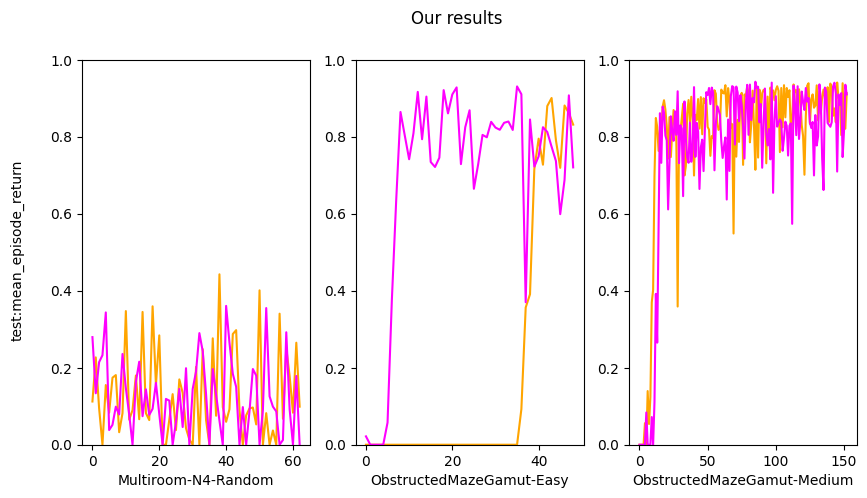

In [64]:
plot_exp(titles, results)